## Preamble

In [1]:
import pandas as pd
import numpy as np
import logging
from collections import defaultdict
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.ticker as ticker
pd.options.display.max_rows = 30
logger = logging.getLogger()

import datetime as dt
import matplotlib.dates as mdates


In [2]:
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

## Reading and processing the "r" file

In [3]:
r = pd.read_excel('./r2.xlsx', skiprows=[0])
r.columns = ['date', 'r','event']
ins1 = SimpleExpSmoothing(r['r']).fit(smoothing_level=0.15,optimized=False)
r['r_smoothed'] = ins1.fittedvalues
display(r)

,date,r,event,r_smoothed
0,01-03-2020,2.64,NaN,2.640000
1,02-03-2020,2.25,NaN,2.640000
2,03-03-2020,2.39,NaN,2.581500
3,04-03-2020,2.44,NaN,2.552775
4,05-03-2020,2.36,NaN,2.535859
...,...,...,...,...
629,20-11-2021,1.02,NaN,1.035938
630,21-11-2021,1.02,NaN,1.033547
631,22-11-2021,1.01,תחילת מבצע חיסונים לילדים בני 5-11,1.031515
632,23-11-2021,1.00,NaN,1.028288


## Reading and processing the number of vaccinated

In [4]:
df_vax = pd.read_excel('./vax2.xlsx', skiprows=[0])
display(df_vax)
df_vax.columns = ['date', 'vax1', 'vax2', 'vax3', 'per_vax1', 'per_vax2', 'per_vax3', 'per_unvax', 'per_expired','per_valid']
df_vax['daily_gain'] = df_vax['vax2'].diff()
df_vax['daily_gain3'] = df_vax['vax3'].diff()

df_vax['daily_gain_tokef'] = df_vax['per_valid'].diff()
df_vax['daily_gain_expired'] = df_vax['per_expired'].diff()



display(df_vax)


,תאריך,מתחסנים מנה ראשונה,מתחסנים מנה שניה,מתחסנים מנה שלישית,אחוז מתחסנים מנה ראשונה,אחוז מתחסנים מנה שניה,אחוז מתחסנים מנה שלישית,אחוז לא מחוסנים,אחוז מחוסנים ללא תוקף,אחוז מחוסנים
0,19-12-2020,67,1,0,0.00,0.00,0.00,100.00,0.00,0.00
1,20-12-2020,7452,1,0,0.08,0.00,0.00,100.00,0.00,0.00
2,21-12-2020,32359,1,0,0.35,0.00,0.00,100.00,0.00,0.00
3,22-12-2020,76992,1,0,0.83,0.00,0.00,100.00,0.00,0.00
4,23-12-2020,139880,1,0,1.50,0.00,0.00,100.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
347,01-12-2021,6345538,5778611,4087246,68.24,62.14,43.95,32.88,9.42,57.70
348,02-12-2021,6354689,5779980,4092089,68.34,62.16,44.00,32.81,9.40,57.79
349,03-12-2021,6361042,5780576,4094742,68.40,62.16,44.03,32.75,9.41,57.84
350,04-12-2021,6363530,5780797,4095549,68.43,62.16,44.04,32.73,9.42,57.84


,date,vax1,vax2,vax3,per_vax1,per_vax2,per_vax3,per_unvax,per_expired,per_valid,daily_gain,daily_gain3,daily_gain_tokef,daily_gain_expired
0,19-12-2020,67,1,0,0.00,0.00,0.00,100.00,0.00,0.00,NaN,NaN,NaN,NaN
1,20-12-2020,7452,1,0,0.08,0.00,0.00,100.00,0.00,0.00,0.0,0.0,0.00,0.00
2,21-12-2020,32359,1,0,0.35,0.00,0.00,100.00,0.00,0.00,0.0,0.0,0.00,0.00
3,22-12-2020,76992,1,0,0.83,0.00,0.00,100.00,0.00,0.00,0.0,0.0,0.00,0.00
4,23-12-2020,139880,1,0,1.50,0.00,0.00,100.00,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,01-12-2021,6345538,5778611,4087246,68.24,62.14,43.95,32.88,9.42,57.70,1022.0,4208.0,0.07,0.00
348,02-12-2021,6354689,5779980,4092089,68.34,62.16,44.00,32.81,9.40,57.79,1369.0,4843.0,0.09,-0.02
349,03-12-2021,6361042,5780576,4094742,68.40,62.16,44.03,32.75,9.41,57.84,596.0,2653.0,0.05,0.01
350,04-12-2021,6363530,5780797,4095549,68.43,62.16,44.04,32.73,9.42,57.84,221.0,807.0,0.00,0.01


## Reading and processing the numebr of daily cases

In [5]:
df_cases = pd.read_excel('./cases2.xlsx', skiprows=[0])
display(df_cases)
df_cases.columns = ['date', 'age_group', 'vax3_pos', 'vax2_pos', 'vax0_pos', 'cases_vax3_norm', 'cases_vax2_norm', 'cases_vax0_norm']
df_cases = df_cases[df_cases['age_group'] == 'כלל האוכלוסיה']
display(df_cases)


,תאריך,קבוצת גיל,מאומתים מחוסנים,מאומתים מחוסנים ללא תוקף,מאומתים לא מחוסנים,מאומתים מחוסנים ל-100 אלף תושבים,מאומתים מחוסנים ללא תוקף ל-100 אלף תושבים,מאומתים לא מחוסנים ל-100 אלף תושבים
0,17-01-2021,מתחת לגיל 60,1,0,4436,6.4,0.0,66.6
1,17-01-2021,מעל גיל 60,0,0,243,0.0,0.0,51.4
2,17-01-2021,כלל האוכלוסיה,1,0,4715,3.9,0.0,66.1
3,18-01-2021,כלל האוכלוסיה,6,0,8714,13.2,0.0,123.4
4,18-01-2021,מתחת לגיל 60,2,0,8290,7.9,0.0,125.7
...,...,...,...,...,...,...,...,...
964,04-12-2021,מתחת לגיל 60,53,29,126,1.4,3.8,4.4
965,04-12-2021,כלל האוכלוסיה,66,33,131,1.3,3.9,4.4
966,05-12-2021,מעל גיל 60,5,1,3,0.4,1.0,2.6
967,05-12-2021,מתחת לגיל 60,61,31,199,1.6,4.1,7.0


,date,age_group,vax3_pos,vax2_pos,vax0_pos,cases_vax3_norm,cases_vax2_norm,cases_vax0_norm
2,17-01-2021,כלל האוכלוסיה,1,0,4715,3.9,0.0,66.1
3,18-01-2021,כלל האוכלוסיה,6,0,8714,13.2,0.0,123.4
6,19-01-2021,כלל האוכלוסיה,9,0,7329,11.0,0.0,104.9
9,20-01-2021,כלל האוכלוסיה,18,0,7157,12.9,0.0,103.6
14,21-01-2021,כלל האוכלוסיה,23,0,6264,11.0,0.0,91.6
...,...,...,...,...,...,...,...,...
954,01-12-2021,כלל האוכלוסיה,82,64,395,1.6,7.5,13.2
958,02-12-2021,כלל האוכלוסיה,67,57,376,1.3,6.7,12.6
961,03-12-2021,כלל האוכלוסיה,94,33,324,1.8,3.9,10.9
965,04-12-2021,כלל האוכלוסיה,66,33,131,1.3,3.9,4.4


## Calculating the crude VE using the daily cases

In [6]:
def crude_ve(df_cases):
    df_cases['ve_dose2'] = 1 - (df_cases['cases_vax2_norm'] / df_cases['cases_vax0_norm'])
    df_cases['ve_dose3'] = 1 - (df_cases['cases_vax3_norm'] / df_cases['cases_vax0_norm'])
    df_cases['ve_dose3_2'] = 1 - (df_cases['cases_vax3_norm'] / df_cases['cases_vax2_norm'])
    
    return df_cases

df_cases = crude_ve(df_cases)
display(df_cases)

,date,age_group,vax3_pos,vax2_pos,vax0_pos,cases_vax3_norm,cases_vax2_norm,cases_vax0_norm,ve_dose2,ve_dose3,ve_dose3_2
2,17-01-2021,כלל האוכלוסיה,1,0,4715,3.9,0.0,66.1,1.000000,0.940998,-inf
3,18-01-2021,כלל האוכלוסיה,6,0,8714,13.2,0.0,123.4,1.000000,0.893031,-inf
6,19-01-2021,כלל האוכלוסיה,9,0,7329,11.0,0.0,104.9,1.000000,0.895138,-inf
9,20-01-2021,כלל האוכלוסיה,18,0,7157,12.9,0.0,103.6,1.000000,0.875483,-inf
14,21-01-2021,כלל האוכלוסיה,23,0,6264,11.0,0.0,91.6,1.000000,0.879913,-inf
...,...,...,...,...,...,...,...,...,...,...,...
954,01-12-2021,כלל האוכלוסיה,82,64,395,1.6,7.5,13.2,0.431818,0.878788,0.786667
958,02-12-2021,כלל האוכלוסיה,67,57,376,1.3,6.7,12.6,0.468254,0.896825,0.805970
961,03-12-2021,כלל האוכלוסיה,94,33,324,1.8,3.9,10.9,0.642202,0.834862,0.538462
965,04-12-2021,כלל האוכלוסיה,66,33,131,1.3,3.9,4.4,0.113636,0.704545,0.666667


## merging all files together

In [7]:
df_all = df_cases
df_all = pd.merge(df_vax, df_cases, "inner", on='date')
df_all = pd.merge(df_all, r, "left", on='date') #left merge to avoid cutting new dates before R calculation
df_all['date'] = pd.to_datetime(df_all['date'], format='%d-%m-%Y')
display(df_all)



,date,vax1,vax2,vax3,per_vax1,per_vax2,per_vax3,per_unvax,per_expired,per_valid,...,vax0_pos,cases_vax3_norm,cases_vax2_norm,cases_vax0_norm,ve_dose2,ve_dose3,ve_dose3_2,r,event,r_smoothed
0,2021-01-17,2211294,333065,0,23.78,3.58,0.00,99.64,0.00,0.36,...,4715,3.9,0.0,66.1,1.000000,0.940998,-inf,0.92,NaN,0.983546
1,2021-01-18,2280974,453425,0,24.53,4.88,0.00,99.36,0.00,0.64,...,8714,13.2,0.0,123.4,1.000000,0.893031,-inf,0.94,NaN,0.974014
2,2021-01-19,2353727,591177,0,25.31,6.36,0.00,98.84,0.00,1.16,...,7329,11.0,0.0,104.9,1.000000,0.895138,-inf,0.94,NaN,0.968912
3,2021-01-20,2430466,734825,0,26.14,7.90,0.00,98.02,0.00,1.98,...,7157,12.9,0.0,103.6,1.000000,0.875483,-inf,0.95,NaN,0.964575
4,2021-01-21,2500315,899124,0,26.89,9.67,0.00,97.02,0.00,2.98,...,6264,11.0,0.0,91.6,1.000000,0.879913,-inf,0.97,NaN,0.962389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2021-12-01,6345538,5778611,4087246,68.24,62.14,43.95,32.88,9.42,57.70,...,395,1.6,7.5,13.2,0.431818,0.878788,0.786667,NaN,NaN,NaN
319,2021-12-02,6354689,5779980,4092089,68.34,62.16,44.00,32.81,9.40,57.79,...,376,1.3,6.7,12.6,0.468254,0.896825,0.805970,NaN,NaN,NaN
320,2021-12-03,6361042,5780576,4094742,68.40,62.16,44.03,32.75,9.41,57.84,...,324,1.8,3.9,10.9,0.642202,0.834862,0.538462,NaN,NaN,NaN
321,2021-12-04,6363530,5780797,4095549,68.43,62.16,44.04,32.73,9.42,57.84,...,131,1.3,3.9,4.4,0.113636,0.704545,0.666667,NaN,NaN,NaN


## Plotting the VE for fully vaxxed for santity check

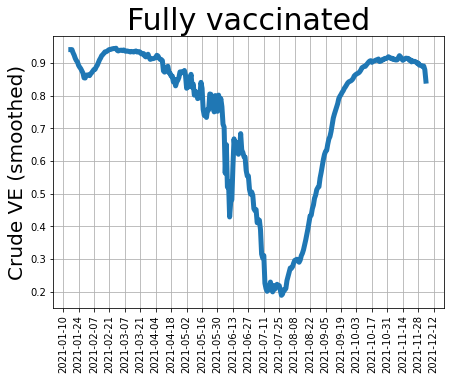

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))

data = df_all['ve_dose3']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
smoothed = ins1.fittedvalues
axs.plot(df_all['date'], smoothed, linewidth=5)
axs.xaxis.set_major_locator(ticker.MultipleLocator(14))
axs.set_ylabel(r'Crude VE (smoothed)', fontsize=20)
#axs.set_xlim([dt.datetime(2021, 1, 10), dt.datetime(2021, 8, 8)])
axs.set_title("Fully vaccinated", fontsize = 30)


for tick in axs.get_xticklabels():
    tick.set_rotation(90)
    
axs.grid()


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


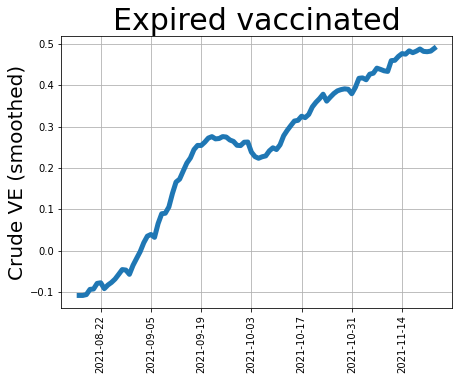

In [124]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))


df_all_aug = df_all[df_all['date'] > dt.datetime(2021, 8, 15)]
data = df_all_aug['ve_dose2']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.1,optimized=False)
smoothed = ins1.fittedvalues
axs.plot(df_all_aug['date'], smoothed, linewidth=5)
axs.xaxis.set_major_locator(ticker.MultipleLocator(14))
axs.set_ylabel(r'Crude VE (smoothed)', fontsize=20)
#axs.set_xlim([dt.datetime(2021, 8, 15), dt.datetime(2021, 10, 15)])
axs.set_title("Expired vaccinated", fontsize = 30)

for tick in axs.get_xticklabels():
    tick.set_rotation(90)
    
axs.grid()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


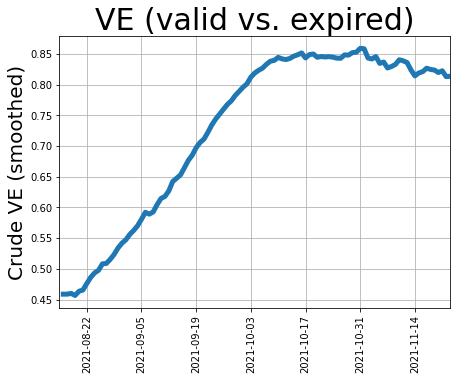

In [125]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))



df_all_aug = df_all[df_all['date'] > dt.datetime(2021, 8, 15)]
data = df_all_aug['ve_dose3_2']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.15,optimized=False)
smoothed = ins1.fittedvalues
axs.plot(df_all_aug['date'], smoothed, linewidth=5)
axs.xaxis.set_major_locator(ticker.MultipleLocator(14))
axs.set_ylabel(r'Crude VE (smoothed)', fontsize=20)
axs.set_xlim([dt.datetime(2021, 8, 15), dt.datetime(2021, 11, 23)])
axs.set_title("VE (valid vs. expired)", fontsize = 30)


for tick in axs.get_xticklabels():
    tick.set_rotation(90)
    
axs.grid()

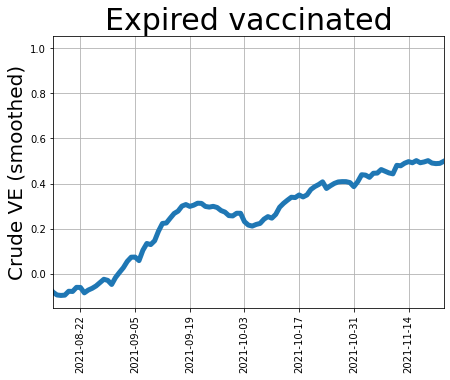

In [126]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))

data = df_all['ve_dose2']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.15,optimized=False)
smoothed = ins1.fittedvalues
axs.plot(df_all['date'], smoothed, linewidth=5)
axs.xaxis.set_major_locator(ticker.MultipleLocator(14))
axs.set_ylabel(r'Crude VE (smoothed)', fontsize=20)
axs.set_xlim([dt.datetime(2021, 8, 15), dt.datetime(2021, 11, 23)])
axs.set_title("Expired vaccinated", fontsize = 30)


for tick in axs.get_xticklabels():
    tick.set_rotation(90)
    
axs.grid()

## The main figures

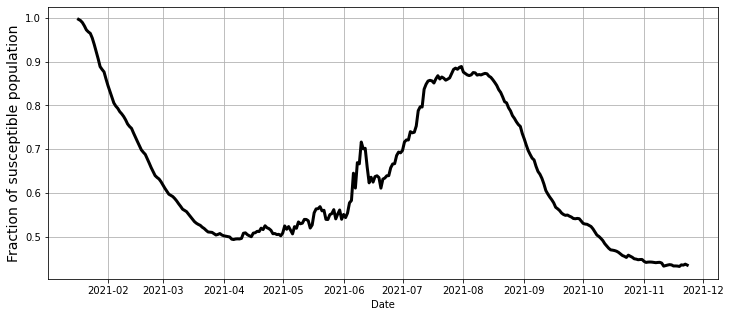

In [129]:
data = df_all['ve_dose3']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.15,optimized=False)
smoothed_ve3 = ins1.fittedvalues

data = df_all['ve_dose2']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.15,optimized=False)
smoothed_ve2 = ins1.fittedvalues


fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))
isr_protection = \
                1 - \
                 (smoothed_ve2 * (df_all['per_expired'] / 100) + \
                 smoothed_ve3 * df_all['per_valid'] / 100)

ax1.plot(df_all['date'], isr_protection, color = 'black',  linewidth = 3)
ax1.set_xlabel('Date')
ax1.set_ylabel('Fraction of susceptible population', color='black', fontsize = 14)
ax1.grid()

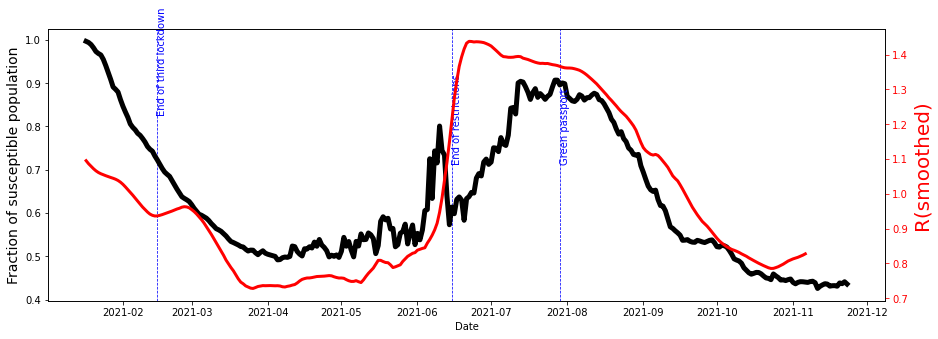

In [73]:
data = df_all['ve_dose3']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.3,optimized=False)
smoothed_ve3 = ins1.fittedvalues

data = df_all['ve_dose2']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.3,optimized=False)
smoothed_ve2 = ins1.fittedvalues


isr_protection = \
                1 - \
                 (smoothed_ve2 * (df_all['per_expired'] / 100) + \
                 smoothed_ve3 * df_all['per_valid'] / 100)


fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5))
ax2 = ax1.twinx()

ax1.plot(df_all['date'], isr_protection, color = 'black', linewidth = 5)
ax2.plot(df_all['date'], df_all['r_smoothed'], color = 'red', linewidth = 3)

ax1.set_xlabel('Date')
ax1.set_ylabel('Fraction of susceptible population', color='black', fontsize = 14)
ax2.set_ylabel('R(smoothed)', color='red', fontsize = 20)

y0, y1 = ax1.get_ylim()
x = dt.datetime(2021, 2, 15)
ax1.vlines(x, y0, y1, linestyle = 'dashed', color = 'blue', linewidth = 0.75)
ax1.set_ylim(y0,y1)
ax1.text(x, y1*0.81, 'End of third lockdown', color = 'blue', rotation = 'vertical')

y0, y1 = ax1.get_ylim()
x = dt.datetime(2021, 6, 15)
ax1.vlines(x, y0, y1, linestyle = 'dashed', color = 'blue', linewidth = 0.75)
ax1.set_ylim(y0,y1)
ax1.text(x, y1*0.7, 'End of restrictions', color = 'blue', rotation = 'vertical')


y0, y1 = ax1.get_ylim()
x = dt.datetime(2021, 7, 29)
ax1.vlines(x, y0, y1, linestyle = 'dashed', color = 'blue', linewidth = 0.75)
ax1.set_ylim(y0,y1)
ax1.text(x, y1*0.7, 'Green passport', color = 'blue', rotation = 'vertical')





#ax1.grid()

[t.set_color('red') for t in ax2.yaxis.get_ticklines()]
[t.set_color('red') for t in ax2.yaxis.get_ticklabels()]





plt.show()












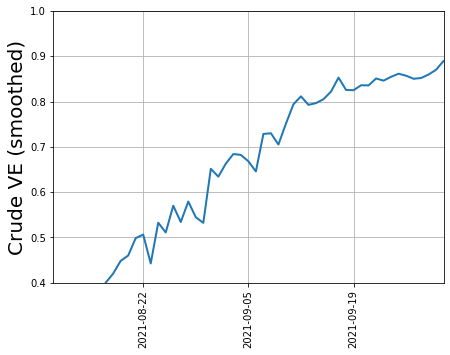

In [43]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))


data = df_all['ve_dose3']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=1,optimized=False)
smoothed = ins1.fittedvalues
axs.plot(df_all['date'], smoothed, linewidth=2)
axs.xaxis.set_major_locator(ticker.MultipleLocator(14))
axs.set_ylabel(r'Crude VE (smoothed)', fontsize=20)
axs.set_xlim([dt.datetime(2021, 8, 10), dt.datetime(2021, 10, 1)])
axs.set_ylim([0.4, 1])

for tick in axs.get_xticklabels():
    tick.set_rotation(90)
    
axs.grid()


## 60+

In [112]:
df_cases = pd.read_excel('./cases.xlsx', skiprows=[0])
df_cases.columns = ['date', 'age_group', 'vax3_pos', 'vax2_pos', 'vax0_pos', 'cases_vax3_norm', 'cases_vax2_norm', 'cases_vax0_norm']
df_cases = df_cases[df_cases['age_group'] == 'מעל גיל 60']
display(df_cases)

,date,age_group,vax3_pos,vax2_pos,vax0_pos,cases_vax3_norm,cases_vax2_norm,cases_vax0_norm
1,17-01-2021,מעל גיל 60,0,0,243,0.0,0.0,51.4
3,18-01-2021,מעל גיל 60,4,0,346,19.8,0.0,74.2
7,19-01-2021,מעל גיל 60,2,0,320,4.6,0.0,69.7
9,20-01-2021,מעל גיל 60,9,0,323,10.6,0.0,71.3
13,21-01-2021,מעל גיל 60,8,0,301,5.8,0.0,67.4
...,...,...,...,...,...,...,...,...
920,19-11-2021,מעל גיל 60,15,4,7,1.1,3.9,5.9
923,20-11-2021,מעל גיל 60,2,1,9,0.1,1.0,7.5
925,21-11-2021,מעל גיל 60,2,3,9,0.1,2.9,7.6
929,22-11-2021,מעל גיל 60,9,6,10,0.7,5.9,8.4


In [113]:
def crude_ve(df_cases):
    df_cases['ve_dose2'] = 1 - (df_cases['cases_vax2_norm'] / df_cases['cases_vax0_norm'])
    df_cases['ve_dose3'] = 1 - (df_cases['cases_vax3_norm'] / df_cases['cases_vax0_norm'])
    df_cases['ve_dose3_2'] = 1 - (df_cases['cases_vax3_norm'] / df_cases['cases_vax2_norm'])
    
    return df_cases

df_cases = crude_ve(df_cases)
display(df_cases)


df_all = df_cases
df_all['date'] = pd.to_datetime(df_all['date'], format='%d-%m-%Y')
display(df_all)

,date,age_group,vax3_pos,vax2_pos,vax0_pos,cases_vax3_norm,cases_vax2_norm,cases_vax0_norm,ve_dose2,ve_dose3,ve_dose3_2
1,17-01-2021,מעל גיל 60,0,0,243,0.0,0.0,51.4,1.000000,1.000000,NaN
3,18-01-2021,מעל גיל 60,4,0,346,19.8,0.0,74.2,1.000000,0.733154,-inf
7,19-01-2021,מעל גיל 60,2,0,320,4.6,0.0,69.7,1.000000,0.934003,-inf
9,20-01-2021,מעל גיל 60,9,0,323,10.6,0.0,71.3,1.000000,0.851332,-inf
13,21-01-2021,מעל גיל 60,8,0,301,5.8,0.0,67.4,1.000000,0.913947,-inf
...,...,...,...,...,...,...,...,...,...,...,...
920,19-11-2021,מעל גיל 60,15,4,7,1.1,3.9,5.9,0.338983,0.813559,0.717949
923,20-11-2021,מעל גיל 60,2,1,9,0.1,1.0,7.5,0.866667,0.986667,0.900000
925,21-11-2021,מעל גיל 60,2,3,9,0.1,2.9,7.6,0.618421,0.986842,0.965517
929,22-11-2021,מעל גיל 60,9,6,10,0.7,5.9,8.4,0.297619,0.916667,0.881356


,date,age_group,vax3_pos,vax2_pos,vax0_pos,cases_vax3_norm,cases_vax2_norm,cases_vax0_norm,ve_dose2,ve_dose3,ve_dose3_2
1,2021-01-17,מעל גיל 60,0,0,243,0.0,0.0,51.4,1.000000,1.000000,NaN
3,2021-01-18,מעל גיל 60,4,0,346,19.8,0.0,74.2,1.000000,0.733154,-inf
7,2021-01-19,מעל גיל 60,2,0,320,4.6,0.0,69.7,1.000000,0.934003,-inf
9,2021-01-20,מעל גיל 60,9,0,323,10.6,0.0,71.3,1.000000,0.851332,-inf
13,2021-01-21,מעל גיל 60,8,0,301,5.8,0.0,67.4,1.000000,0.913947,-inf
...,...,...,...,...,...,...,...,...,...,...,...
920,2021-11-19,מעל גיל 60,15,4,7,1.1,3.9,5.9,0.338983,0.813559,0.717949
923,2021-11-20,מעל גיל 60,2,1,9,0.1,1.0,7.5,0.866667,0.986667,0.900000
925,2021-11-21,מעל גיל 60,2,3,9,0.1,2.9,7.6,0.618421,0.986842,0.965517
929,2021-11-22,מעל גיל 60,9,6,10,0.7,5.9,8.4,0.297619,0.916667,0.881356


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


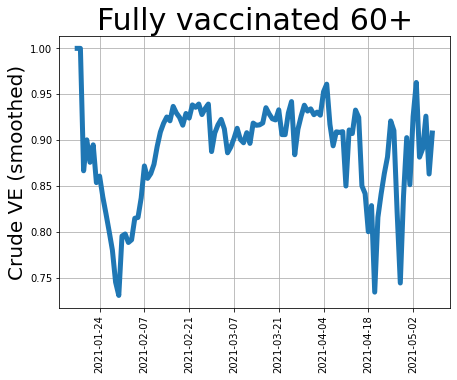

In [114]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))

data = df_all['ve_dose3']
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.5,optimized=False)
smoothed = ins1.fittedvalues
axs.plot(df_all['date'], smoothed, linewidth=5)
axs.xaxis.set_major_locator(ticker.MultipleLocator(14))
axs.set_ylabel(r'Crude VE (smoothed)', fontsize=20)
#axs.set_xlim([dt.datetime(2021, 1, 10), dt.datetime(2021, 8, 8)])
axs.set_title("Fully vaccinated 60+", fontsize = 30)


for tick in axs.get_xticklabels():
    tick.set_rotation(90)
    
axs.grid()